In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
martabase = pd.read_csv("martabase_final.csv")

In [3]:
martabase

,ID,Station,Latitude,Longitude,Color
0,1,Airport,33.640758,-84.446341,NaN
1,2,Arts Center,33.789705,-84.387789,NaN
2,3,Ashby,33.756346,-84.417556,NaN
3,4,Avondale,33.775277,-84.281903,NaN
4,5,Bankhead,33.771890,-84.428840,NaN
...,...,...,...,...,...
155,156,Standing Peachtree Park,33.830141,-84.445858,NaN
156,157,Kennedy Memorial Gardens,33.677714,-84.289007,NaN
157,158,Chapel Hill Park,33.673422,-84.225972,NaN
158,159,Collins Hill Park,34.017629,-84.014661,NaN


In [4]:
martabase.shape

(160, 5)

In [5]:
import folium

mapmarta=folium.Map(location=[33.934150, -84.246706])

for ind in range(len(martabase["Station"])):
    name = martabase.iloc[ind,1]
    lat = martabase.iloc[ind,2]
    longi = martabase.iloc[ind,3]
    folium.Marker([lat,longi],tooltip=name, icon=folium.Icon(color='black',icon_color='red')).add_to(mapmarta)
mapmarta

In [6]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def addEdge(self, v1, v2):
        self.graph[v1].append(v2)
        self.graph[v2].append(v1)

    def DepthFirst(self, v, visited_list):
        visited_list[v] = True
        for i in self.graph[v]:
            if visited_list[i] == False:
                self.DepthFirst(i, visited_list)
    
    def isConnected(self):
        visited_list = False*(self.V)
        for i in range(self.V):
            if(len(self.graph[i]) != 0):
                break
        if i == self.V-1:
            return True
       
        self.DepthFirst(i, visited_list)
 
        # Check if all non-zero degree vertices are visited
        for i in range(self.V):
            if visited_list[i] == False and len(self.graph[i]) > 0:
                return False
 
        return True
    
    def isEulerian(self):
        # Check if all non-zero degree vertices are connected
        if self.isConnected() == False:
            return 0
        else:
            # Count vertices with odd degree
            odd = 0
            for i in range(self.V):
                if len(self.graph[i]) % 2 != 0:
                    odd += 1
            #number of odds:
                # 0 -> euler cycle
                # 2 -> euler path 
                # >2 -> not eulerian 
            if odd == 0:
                return 2 #euler cycle
            elif odd == 2:
                return 1 #euler path
            elif odd > 2:
                return 0 #no euler
    
    def test(self):
        result = self.isEulerian()
        if res == 0:
            print("Graph is not Eulerian")
        elif res == 1:
            print("Graph has a Euler path")
        else:
            print("Graph has a Euler cycle")

In [7]:
g = Graph(160)
g.addEdge(1,2)

In [8]:
latitudes = martabase.iloc[:,2]
longitudes = martabase.iloc[:,3]
longitudes*=-1

In [9]:
nplats = latitudes.to_numpy()
nplongs = longitudes.to_numpy()

In [10]:
from sklearn.preprocessing import MinMaxScaler

nplats = nplats.reshape(-1, 1)
nplongs = nplongs.reshape(-1, 1)

lats_fin = MinMaxScaler().fit_transform(nplats)
longs_fin = MinMaxScaler().fit_transform(nplongs)

In [11]:
lats_fin

array([[0.06162806],
       [0.30460848],
       [0.25018923],
       [0.28107178],
       [0.27554649],
       [0.4204323 ],
       [0.4003752 ],
       [0.46349103],
       [0.26643556],
       [0.07943393],
       [0.28015824],
       [0.25010277],
       [0.48792659],
       [0.51911909],
       [0.26457749],
       [0.1220783 ],
       [0.25941436],
       [0.2460783 ],
       [0.23632137],
       [0.24071615],
       [0.24740294],
       [0.27212724],
       [0.25206688],
       [0.27680914],
       [0.23976998],
       [0.15901631],
       [0.39830995],
       [0.35728385],
       [0.50197227],
       [0.29060522],
       [0.27525612],
       [0.5572137 ],
       [0.1857553 ],
       [0.25562316],
       [0.53842577],
       [0.25104405],
       [0.21668842],
       [0.24495922],
       [0.76027732],
       [0.53130669],
       [0.84556281],
       [0.61658564],
       [0.68632137],
       [0.74995269],
       [0.69017945],
       [0.87550408],
       [0.79616313],
       [0.787

In [12]:
longs_fin

array([[6.28094780e-01],
       [5.60284665e-01],
       [5.94758359e-01],
       [4.37656201e-01],
       [6.07826560e-01],
       [5.04942847e-01],
       [5.36229400e-01],
       [4.66605672e-01],
       [5.59612957e-01],
       [6.30934485e-01],
       [4.53505044e-01],
       [5.71831100e-01],
       [4.35902811e-01],
       [5.10035091e-01],
       [4.73282222e-01],
       [6.21149548e-01],
       [5.04451805e-01],
       [5.64664667e-01],
       [5.70274590e-01],
       [5.58750159e-01],
       [6.53108967e-01],
       [3.77148019e-01],
       [5.19759806e-01],
       [4.02952042e-01],
       [5.45983068e-01],
       [6.07848565e-01],
       [5.23828274e-01],
       [5.36726233e-01],
       [5.19628939e-01],
       [5.58612343e-01],
       [5.59022317e-01],
       [5.23707830e-01],
       [6.03611011e-01],
       [5.60005559e-01],
       [5.18858791e-01],
       [5.78954683e-01],
       [5.89435649e-01],
       [6.28371571e-01],
       [4.27669751e-01],
       [3.88088758e-01],


In [13]:
vertices_fin = np.hstack((lats_fin, longs_fin))
vertices_fin

array([[6.16280587e-02, 6.28094780e-01],
       [3.04608483e-01, 5.60284665e-01],
       [2.50189233e-01, 5.94758359e-01],
       [2.81071778e-01, 4.37656201e-01],
       [2.75546493e-01, 6.07826560e-01],
       [4.20432300e-01, 5.04942847e-01],
       [4.00375204e-01, 5.36229400e-01],
       [4.63491028e-01, 4.66605672e-01],
       [2.66435563e-01, 5.59612957e-01],
       [7.94339315e-02, 6.30934485e-01],
       [2.80158238e-01, 4.53505044e-01],
       [2.50102773e-01, 5.71831100e-01],
       [4.87926591e-01, 4.35902811e-01],
       [5.19119086e-01, 5.10035091e-01],
       [2.64577488e-01, 4.73282222e-01],
       [1.22078303e-01, 6.21149548e-01],
       [2.59414356e-01, 5.04451805e-01],
       [2.46078303e-01, 5.64664667e-01],
       [2.36321370e-01, 5.70274590e-01],
       [2.40716150e-01, 5.58750159e-01],
       [2.47402936e-01, 6.53108967e-01],
       [2.72127243e-01, 3.77148019e-01],
       [2.52066884e-01, 5.19759806e-01],
       [2.76809135e-01, 4.02952042e-01],
       [2.397699

In [14]:
vertices_f = martabase.iloc[:,2:4]
vertices_f

,Latitude,Longitude
0,33.640758,84.446341
1,33.789705,84.387789
2,33.756346,84.417556
3,33.775277,84.281903
4,33.771890,84.428840
...,...,...
155,33.830141,84.445858
156,33.677714,84.289007
157,33.673422,84.225972
158,34.017629,84.014661


In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

ModuleNotFoundError: No module named 'networkx'

In [ ]:
vertices_final = vertices_f.to_numpy()
vertices_final

array([[33.640758  , 84.446341  ],
       [33.789705  , 84.387789  ],
       [33.756346  , 84.417556  ],
       [33.775277  , 84.281903  ],
       [33.77189   , 84.42884   ],
       [33.860705  , 84.340003  ],
       [33.84841   , 84.367018  ],
       [33.8871    , 84.3069    ],
       [33.766305  , 84.387209  ],
       [33.651673  , 84.448793  ],
       [33.774717  , 84.295588  ],
       [33.756293  , 84.397759  ],
       [33.902079  , 84.280389  ],
       [33.9212    , 84.3444    ],
       [33.765166  , 84.312665  ],
       [33.677814  , 84.440344  ],
       [33.762001  , 84.339579  ],
       [33.753826  , 84.391571  ],
       [33.747845  , 84.396415  ],
       [33.750539  , 84.386464  ],
       [33.754638  , 84.46794   ],
       [33.769794  , 84.229656  ],
       [33.757497  , 84.352797  ],
       [33.772664  , 84.251937  ],
       [33.749959  , 84.37544   ],
       [33.700457  , 84.428859  ],
       [33.847144  , 84.35631   ],
       [33.821995  , 84.367447  ],
       [33.910689  ,

Graph with 0 nodes and 0 edges


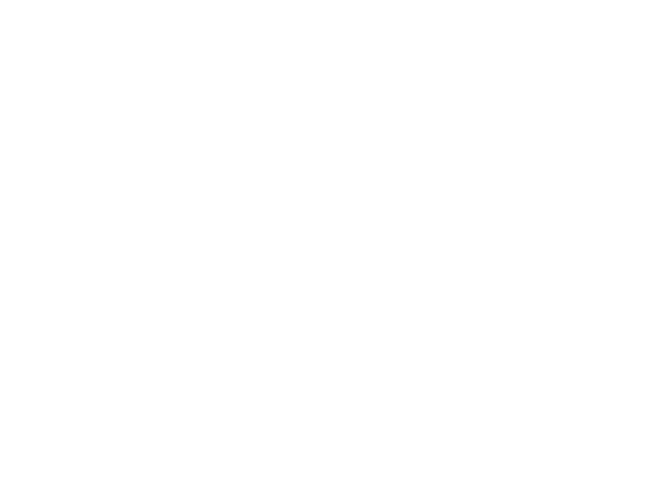

In [ ]:
def distance_formula(x1, y1, x2, y2):
   dist = math.sqrt( (math.pow( (x1 - x2) ,2)) + (math.pow( (y1 - y2) ,2)) )
   print(dist)
   return dist

def generate_knn_graph(n, k, vertices):
    G = nx.Graph()

    for v in vertices:
        # Values for x1,x2
        x1 = v[0]
        y1 = v[1]

        # Calculate distances to other vertices
        for u in vertices:
            distances = []
            try:
                distances.append((u, distance_formula(x1, y1, u[0], u[1])))
            except:
                continue
        
        # Sort distances
        distances.sort(key=lambda x: x[1])

        # Select k nearest neighbors
        neighbors = [u for u, _ in distances[:k]]

        # Add edges
        G.add_edges_from([(v, u) for u in neighbors])

    return G

graph = generate_knn_graph(160, 7, vertices_f)
print(graph)

# Plot the graph
#pos = {i: vertices_final[i] for i in range(160)}
nx.draw(graph)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b3686541-b591-45d5-90b4-564457237abf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>